In [1]:
#PARA PROBAR LOS MODELOS JUNTOS Y COMPARAR

from joblib import load
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Cargando test data (guardado en 'TESIS_KNN_MODEL.py')
test_x = np.load('test_x.npy')
test_y = np.load('test_y.npy')  
print(type(test_x))
print(type(test_y))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [2]:
#Cargando modelo NB
NB_model = load('naive_bayes_model.joblib')

start_time_pred_NB = time.time()
# Usando el modelo para predecir
predictions_NB = NB_model.predict(test_x)
end_time_pred_NB = time.time()

prediction_time_NB = end_time_pred_NB - start_time_pred_NB

c:\Users\Indatech\anaconda3\envs\tesis\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [3]:
print(test_y[:5])
print(predictions_NB[:5])

[1 3 1 3 3]
[1 4 1 3 3]


In [4]:
f1_NB=f1_score(test_y,predictions_NB,average='macro') #Hay que devolver el one hot encoding para poder usar estas funciones
cm_NB =confusion_matrix(test_y,predictions_NB)  #Los argumentos aqui son np.arrays
accuracy = accuracy_score(test_y,predictions_NB)
print('Accuracy of NB model: ',accuracy)
print('f1 parameter of NB model: ',f1_NB)
print('Time for prediction of test set: ', prediction_time_NB)

Accuracy of NB model:  0.6488688192373644
f1 parameter of NB model:  0.616479733911591
Time for prediction of test set:  0.12380814552307129


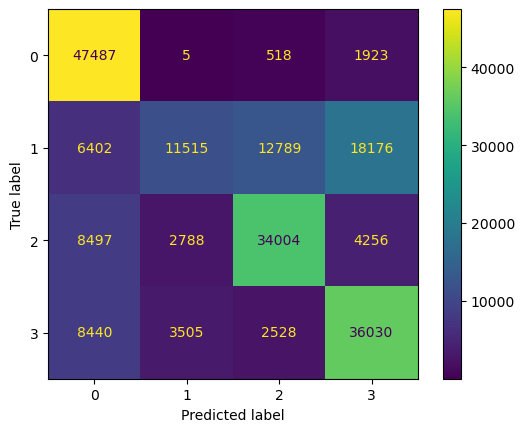

In [5]:
cm_NB_display = ConfusionMatrixDisplay(confusion_matrix = cm_NB)

cm_NB_display.plot()
plt.show()

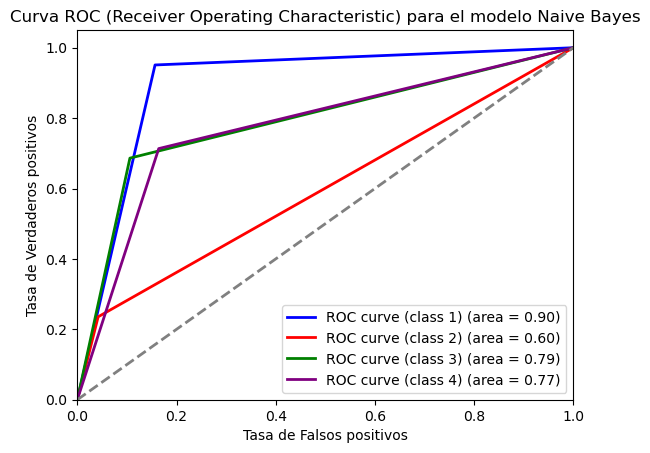

In [47]:
#PLOTEA LA CURVA ROC DE LA MATRIZ DE CONFUSION
from sklearn.preprocessing import label_binarize
test_y_bin = label_binarize(test_y, classes=[1, 2, 3, 4])

test_results_bin = label_binarize(predictions_NB, classes=[1, 2, 3, 4])

fpr = dict()
tpr = dict()
roc_auc = dict()
nclases = 4

for i in range(nclases):  # 4 clases o gestos para clasificar
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], test_results_bin[:,i])  # Assuming 'y_true' and 'y_scores' are arrays with shape (n_samples, num_classes)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotea curva ROC para cada clase
plt.figure()
colors = ['blue', 'red', 'green', 'purple']  # Ajusta colores
for i, color in zip(range(nclases), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (class {0}) (area = {1:0.2f})'.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos positivos')
plt.ylabel('Tasa de Verdaderos positivos')
plt.title('Curva ROC (Receiver Operating Characteristic) para el modelo Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [15]:
#Cargando modelo NN 

NN_model = load('NN_model.joblib')


start_time_pred_NN = time.time()
# Usando el modelo para predecir
predictions_NN = NN_model.predict(test_x)
end_time_pred_NN = time.time()

prediction_time_NN = end_time_pred_NN - start_time_pred_NN


6215/6215 [==============================] - 23s 4ms/step


In [16]:
print(test_y[:5])
print('Con el one-hot enconding: ',np.argmax(predictions_NN,axis=1)[:5])

[1 3 1 3 3]
Con el one-hot enconding:  [0 3 0 2 2]


In [17]:
#PREPROCESAMIENTO HECHO EN EL MODELO
test_y_NN = test_y - 1 #TODAS LAS CLASES DISMINUYEN UN NÚMERO

In [18]:
f1_NN=f1_score(test_y_NN,np.argmax(predictions_NN, axis=1),average='macro') #Hay que devolver el one hot encoding para poder usar estas funciones
cm_NN =confusion_matrix(test_y_NN,np.argmax(predictions_NN, axis=1))  #Los argumentos aqui son np.arrays
accuracy_NN = accuracy_score(test_y_NN,np.argmax(predictions_NN, axis=1))
print('Accuracy of NB model: ',accuracy_NN)
print('f1 parameter of NB model: ',f1_NN)
print('Time for prediction of test set: ', prediction_time_NN)

Accuracy of NB model:  0.8228026329684255
f1 parameter of NB model:  0.8199379435736902
Time for prediction of test set:  29.544106245040894


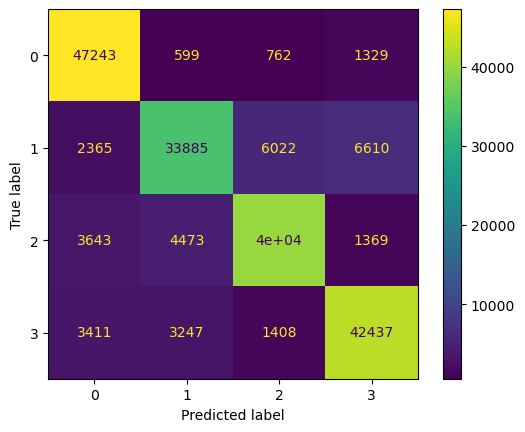

In [19]:
cm_NN_display = ConfusionMatrixDisplay(confusion_matrix = cm_NN)

cm_NN_display.plot()
plt.show()

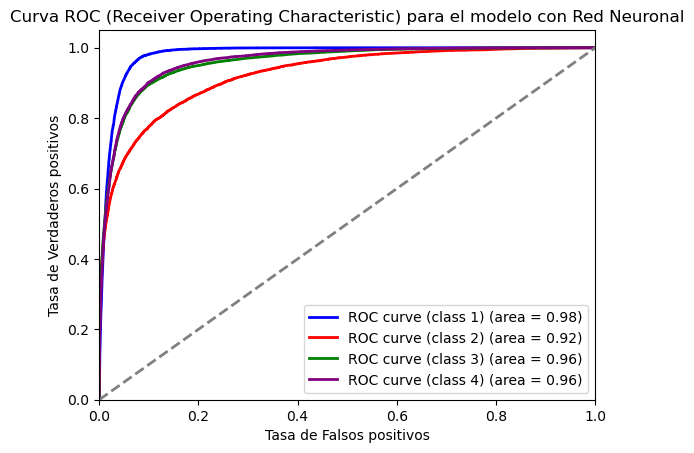

In [48]:
fpr = dict()
tpr = dict()
roc_auc = dict()

test_y_bin = label_binarize(test_y, classes=[1, 2, 3, 4])

for i in range(nclases):  # 4 clases o gestos para clasificar
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], predictions_NN[:, i])  # Asumiendo que 'y_true' y 'y_scores' son matrices con forma (n_samples, num_classes)    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotea curva ROC para cada clase
plt.figure()
colors = ['blue', 'red', 'green', 'purple']  # Ajusta colores
for i, color in zip(range(nclases), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (class {0}) (area = {1:0.2f})'.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos positivos')
plt.ylabel('Tasa de Verdaderos positivos')
plt.title('Curva ROC (Receiver Operating Characteristic) para el modelo con Red Neuronal')
plt.legend(loc="lower right")
plt.show()

In [27]:
#Cargando modelo KNN

KNN_model = load('knn_model.joblib')

start_time_pred_KNN = time.time()
# Usando para predicciones
predictions_KNN = KNN_model.predict(test_x)
end_time_pred_KNN = time.time()

prediction_time_KNN = end_time_pred_KNN - start_time_pred_KNN

In [28]:
print(test_y[:5])

[1 3 1 3 3]


In [29]:
print(test_y[:5])
print(predictions_KNN[:5])

[1 3 1 3 3]
[1 3 1 3 3]


In [30]:
f1_KNN=f1_score(test_y,predictions_KNN,average='macro') #Hay que devolver el one hot encoding para poder usar estas funciones
cm_KNN =confusion_matrix(test_y,predictions_KNN)  #Los argumentos aqui son np.arrays
accuracy_KNN = accuracy_score(test_y,predictions_KNN)
print('Accuracy of NB model: ',accuracy_KNN)
print('f1 parameter of NB model: ',f1_KNN)
print('Time for prediction of test set: ', prediction_time_KNN)

Accuracy of NB model:  0.9519166461332677
f1 parameter of NB model:  0.9521036909164591
Time for prediction of test set:  25.35747528076172


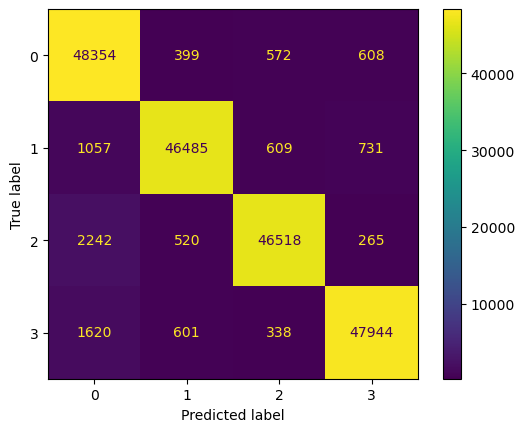

In [31]:
cm_KNN_display = ConfusionMatrixDisplay(confusion_matrix = cm_KNN)

cm_KNN_display.plot()
plt.show()

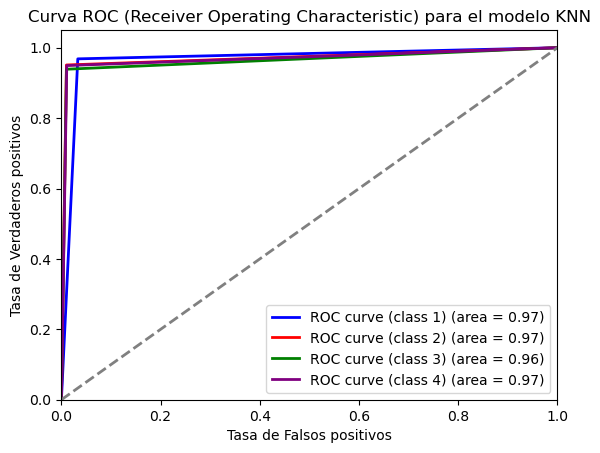

In [49]:
fpr = dict()
tpr = dict()
roc_auc = dict()

test_results_bin = label_binarize(predictions_KNN, classes=[1, 2, 3, 4])

for i in range(nclases):  # 4 clases o gestos para clasificar
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], test_results_bin[:, i])  # Asumiendo que 'y_true' y 'y_scores' son matrices con forma (n_samples, num_classes)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotea curva ROC para cada clase
plt.figure()
colors = ['blue', 'red', 'green', 'purple']  # Ajusta colores
for i, color in zip(range(nclases), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (class {0}) (area = {1:0.2f})'.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos positivos')
plt.ylabel('Tasa de Verdaderos positivos')
plt.title('Curva ROC (Receiver Operating Characteristic) para el modelo KNN')
plt.legend(loc="lower right")
plt.show()

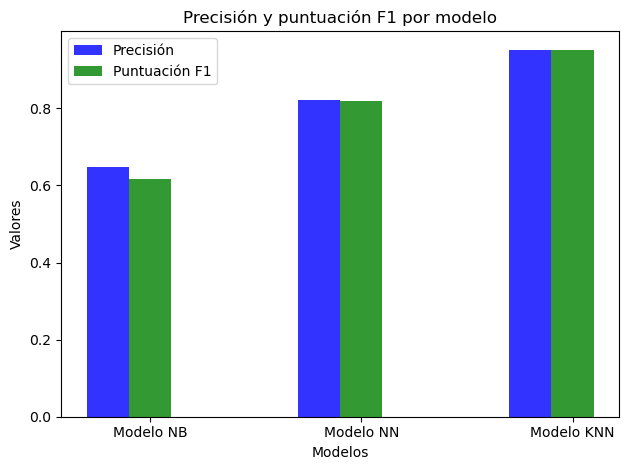

In [51]:
#AHORA COMPAREMOS RESULTADOS
# para pltear la data
all_acc = (accuracy, accuracy_NN, accuracy_KNN)
all_f1 = (f1_NB, f1_NN, f1_KNN)

# crea grafica
fig, ax = plt.subplots()
index = np.arange(3) #3 modelos a comparar
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, all_acc, bar_width,
alpha=opacity,
color='b',
label='Precisión')

rects2 = plt.bar(index + bar_width, all_f1, bar_width,
alpha=opacity,
color='g',
label='Puntuación F1')

plt.xlabel('Modelos')
plt.ylabel('Valores')
plt.title('Precisión y puntuación F1 por modelo')
plt.xticks(index + bar_width, ('Modelo NB', 'Modelo NN', 'Modelo KNN'))
plt.legend()

plt.tight_layout()
plt.show()